In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
sns.set_palette("deep")

In [ ]:
df = pd.read_csv('/content/evaluation_results.csv')

In [21]:
df.columns

Index(['repo_name', 'question', 'documentation', 'ledge',
       'documentation_BERTScore_F1', 'ledge_BERTScore_F1',
       'documentation_ROUGE-L_F1', 'ledge_ROUGE-L_F1', 'documentation_BLEU',
       'ledge_BLEU', 'documentation_Cosine_TFIDF', 'ledge_Cosine_TFIDF',
       'documentation_Jaccard', 'ledge_Jaccard'],
      dtype='object')

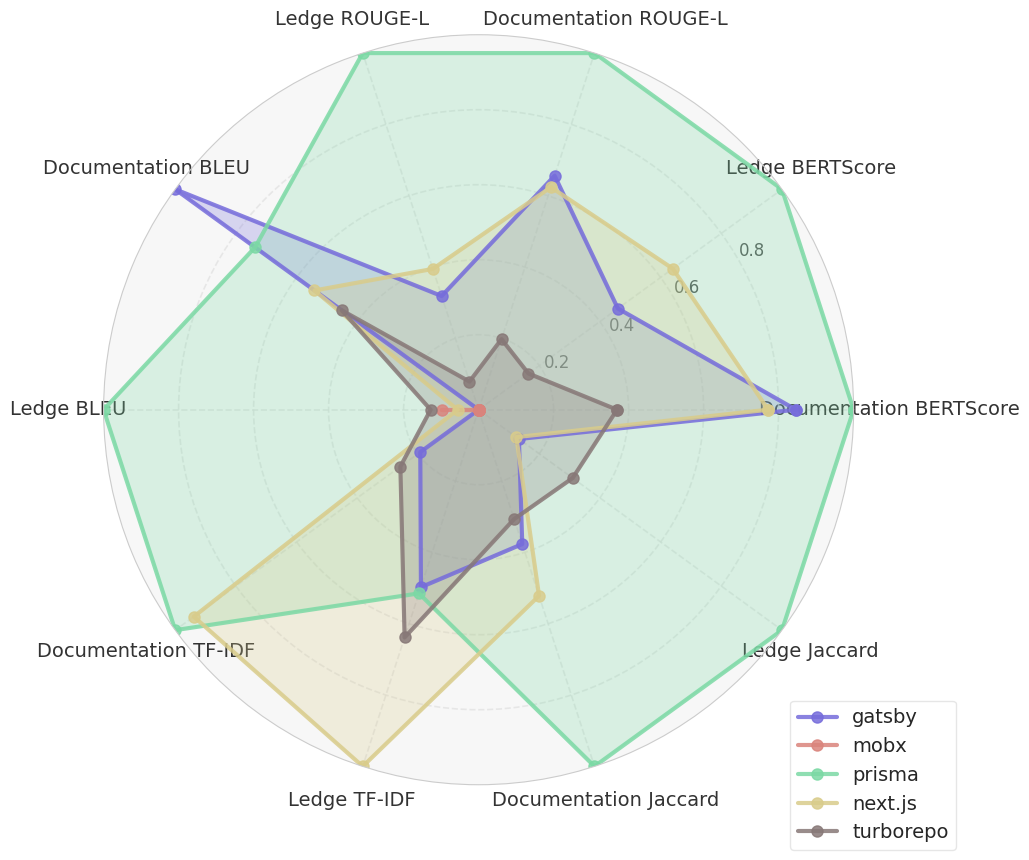

In [22]:
metric_cols = ['documentation_BERTScore_F1', 'ledge_BERTScore_F1', 'documentation_ROUGE-L_F1', 'ledge_ROUGE-L_F1',
               'documentation_BLEU', 'ledge_BLEU', 'documentation_Cosine_TFIDF', 'ledge_Cosine_TFIDF',
               'documentation_Jaccard', 'ledge_Jaccard']

pretty_names = {
    'documentation_BERTScore_F1': 'Documentation BERTScore',
    'ledge_BERTScore_F1': 'Ledge BERTScore',
    'documentation_ROUGE-L_F1': 'Documentation ROUGE-L',
    'ledge_ROUGE-L_F1': 'Ledge ROUGE-L',
    'documentation_BLEU': 'Documentation BLEU',
    'ledge_BLEU': 'Ledge BLEU',
    'documentation_Cosine_TFIDF': 'Documentation TF-IDF',
    'ledge_Cosine_TFIDF': 'Ledge TF-IDF',
    'documentation_Jaccard': 'Documentation Jaccard',
    'ledge_Jaccard': 'Ledge Jaccard'
}

grouped = df.groupby('repo_name')[metric_cols].mean().reset_index()

for col in metric_cols:
    min_val = grouped[col].min()
    max_val = grouped[col].max()
    if max_val != min_val:
        grouped[col] = (grouped[col] - min_val) / (max_val - min_val)
    else:
        grouped[col] = 0.5

categories = [pretty_names[col] for col in metric_cols]
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(16,10), subplot_kw=dict(polar=True))
plt.subplots_adjust(left=0.1, right=0.75, top=0.85, bottom=0.1)


ax.set_facecolor('#F7F7F7')
fig.patch.set_facecolor('#FFFFFF')

plt.xticks(angles[:-1], categories, fontsize=14, color='#333333')
ax.tick_params(pad=15)

ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2','0.4','0.6','0.8'], color='#555555', fontsize=12)
plt.ylim(0,1)

ax.grid(color='#E0E0E0', linestyle='--', linewidth=1.2, alpha=0.7)

colors = ['#766CDB', '#DA847C', '#7CD9A5', '#D9CC8B', '#877877']

for (idx, row), color in zip(grouped.head(5).iterrows(), colors):
    values = row[metric_cols].tolist()
    values += values[:1]
    repo_short = row['repo_name'].split('/')[-1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='-', marker='o', markersize=8, label=repo_short, alpha=0.85)
    ax.fill(angles, values, color=color, alpha=0.25)

plt.legend(loc='lower right', bbox_to_anchor=(1.15, -0.1), fontsize=14, frameon=True, facecolor='white', edgecolor='#E0E0E0')

plt.savefig('radar_chart.png')